In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler


## Random Under-Sampling With Evaluation

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


In [3]:
df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)



df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [5]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [6]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_rus, y_rus, test_size=0.25, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train4 = scaler.fit_transform(x_train4)
x_test4 = scaler.transform(x_test4)
print(len(x_train4), len(y_train4))
print(len(x_test4), len(y_test4))

20110 20110
6704 6704


## Random forest

In [8]:

rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train4, y_train4)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train4)
ypred_test = best_rf.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4, ypred_train))
print("Testing Results\n")
print(classification_report(y_test4, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test4, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(best_rf, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Results

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     10036
           1       0.85      0.80      0.82     10074

    accuracy                           0.83     20110
   macro avg       0.83      0.83      0.83     20110
weighted avg       0.83      0.83      0.83     20110

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3371
           1       0.81      0.75      0.78      3333

    accuracy                           0.78      6704
   macro avg       0.79      0.78      0.78      6704
weighted avg       0.79      0.78      0.78      6704

Confusion Matrix:
 [[2772  599]
 [ 844 2489]]


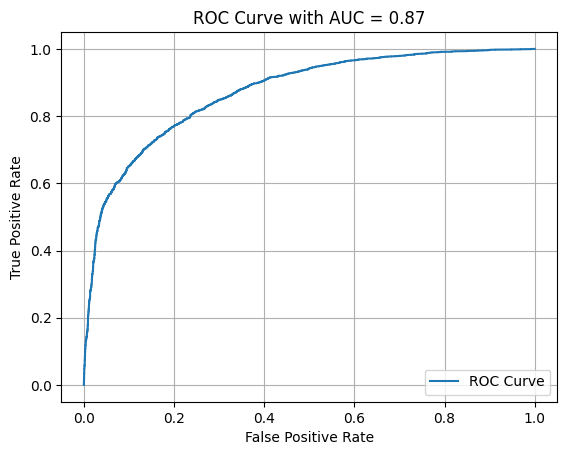

In [9]:

y_proba_test = best_rf.predict_proba(x_test4)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [10]:

# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train4, y_train4)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train4, y_train4)

ypred_train2 = best_tree.predict(x_train4)
ypred_test2 = best_tree.predict(x_test4)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train4, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test4, ypred_test2))

# # Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train4, y_train4, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Najlepsza dokładność: 0.7779214321233218
Training Results

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     10036
           1       0.83      0.79      0.81     10074

    accuracy                           0.81     20110
   macro avg       0.81      0.81      0.81     20110
weighted avg       0.81      0.81      0.81     20110

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3371
           1       0.79      0.74      0.76      3333

    accuracy                           0.77      6704
   macro avg       0.77      0.77      0.77      6704
weighted avg       0.77      0.77      0.77      6704



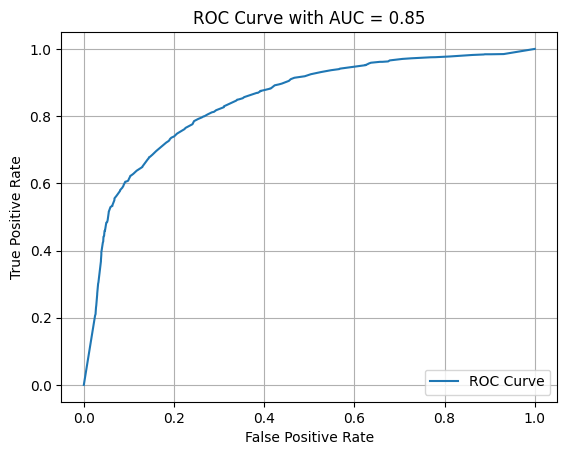

In [11]:

y_proba_test = best_tree.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [12]:
Gnb = GaussianNB()
Gnb.fit(x_train4, y_train4)
ypred_train3 = Gnb.predict(x_train4)
y_pred_test3 = Gnb.predict(x_test4)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test4, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.7749105011933174


In [13]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train3))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test3))

Training Results

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     10036
           1       0.81      0.73      0.77     10074

    accuracy                           0.78     20110
   macro avg       0.78      0.78      0.78     20110
weighted avg       0.78      0.78      0.78     20110

Testing Results

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3371
           1       0.81      0.72      0.76      3333

    accuracy                           0.77      6704
   macro avg       0.78      0.77      0.77      6704
weighted avg       0.78      0.77      0.77      6704



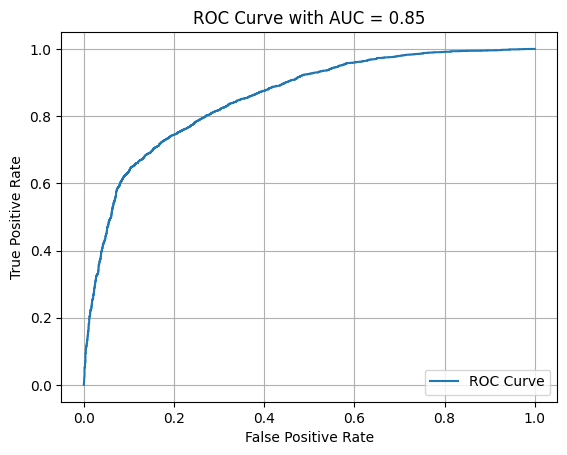

In [14]:
# cross_val_scores = cross_val_score(Gnb, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = Gnb.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Najlepsze parametry:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy on Training set:  0.799801093983093
Accuracy on Test set:  0.7862470167064439

Training Results

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     10036
           1       0.82      0.77      0.79     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3371
           1       0.81      0.75      0.78      3333

    accuracy                           0.79      6704
   macro avg       0.79      0.79      0.79      6704
weighted avg       0.79      0.79      0.79      6704



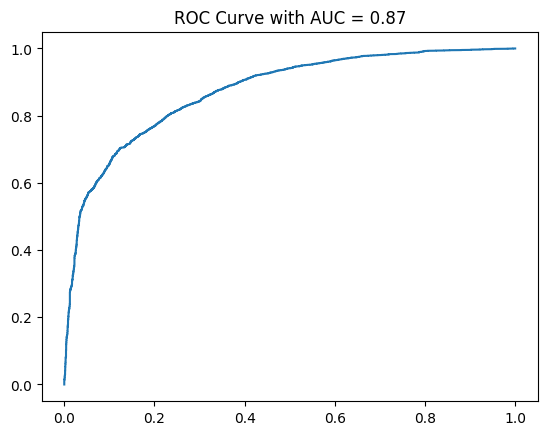

In [15]:
# Inicjalizacja modelu XGBoost
xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train4)
y_pred_test4 = best_xg.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training set:  0.7922923918448533
Accuracy on Test set:  0.7878878281622912

Training Results

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     10036
           1       0.82      0.75      0.78     10074

    accuracy                           0.79     20110
   macro avg       0.79      0.79      0.79     20110
weighted avg       0.79      0.79      0.79     20110

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      3371
           1       0.82      0.73      0.77      3333

    accuracy                           0.79      6704
   macro avg       0.79      0.79      0.79      6704
weighted avg       0.79      0.79      0.79      6704



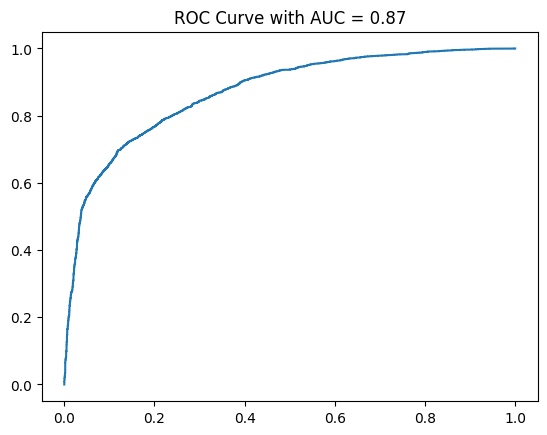

In [16]:
# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train4)
y_pred_test4 = best_lg.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

In [17]:
# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train4)
y_pred_test6 = best_gb.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test6)))
plt.show()

KeyboardInterrupt: 

## KNN

In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train4, y_train4)


KNeighborsClassifier()

In [19]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [20]:
grid_cv.fit(x_train4, 
            y_train4)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [21]:
grid_cv.best_score_

0.7672414309250436

In [22]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=25)

In [23]:
ypred_train7 = grid_cv.predict(x_train4)
y_pred_test7 = grid_cv.predict(x_test4)
print("XGBClassifier Accuracy: ",accuracy_score(y_test4, y_pred_test7))

XGBClassifier Accuracy:  0.7670047732696897


In [24]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train7))
print("Testing Results\n")
print(classification_report(y_test4, y_pred_test7))

Training Results

              precision    recall  f1-score   support

           0       0.77      0.84      0.81     10036
           1       0.83      0.75      0.79     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      3371
           1       0.80      0.71      0.75      3333

    accuracy                           0.77      6704
   macro avg       0.77      0.77      0.77      6704
weighted avg       0.77      0.77      0.77      6704



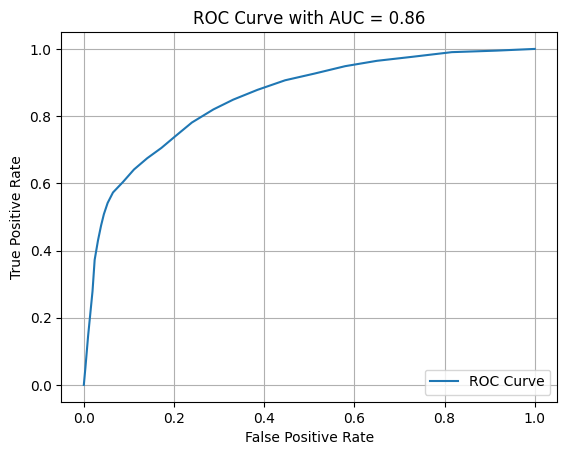

In [25]:

# cross_val_scores = cross_val_score(grid_cv, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = grid_cv.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [26]:
ann = tf.keras.models.Sequential()

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [28]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [31]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
ann.fit(x_train4, y_train4, batch_size = 32, epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


629/629 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7297 - val_loss: 0.4732 - val_accuracy: 0.7742
Epoch 2/100
629/629 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 0.7850 - val_loss: 0.4580 - val_accuracy: 0.7861
Epoch 3/100
629/629 [==============================] - 1s 2ms/step - loss: 0.4442 - accuracy: 0.7880 - val_loss: 0.4517 - val_accuracy: 0.7852
Epoch 4/100
629/629 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.7906 - val_loss: 0.4493 - val_accuracy: 0.7849
Epoch 5/100
629/629 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.7919 - val_loss: 0.4522 - val_accuracy: 0.7827
Epoch 6/100
629/629 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.7922 - val_loss: 0.4481 - val_accuracy: 0.7857
Epoch 7/100
629/629 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.7930 - val_loss: 0.4471 - val_accuracy: 0.78

In [33]:
ypred_train8 = ann.predict(x_train4)
y_pred_test8 = ann.predict(x_test4)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test4.reshape(len(y_test4),1)),1))

210/210 [==============================] - 0s 1ms/step
[[0 1]
 [0 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [34]:
accuracy_score(y_test4, y_pred_test8)

0.7849045346062052

In [35]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train8))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test8))

Training Results

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     10036
           1       0.81      0.79      0.80     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3371
           1       0.80      0.76      0.78      3333

    accuracy                           0.78      6704
   macro avg       0.79      0.78      0.78      6704
weighted avg       0.79      0.78      0.78      6704



  1/210 [..............................] - ETA: 4s

210/210 [==============================] - 0s 1ms/step


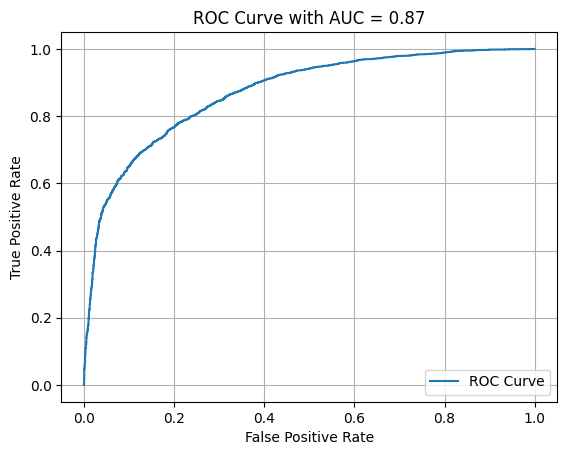

In [36]:
# cross_val_scores = cross_val_score(ann, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = ann.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [37]:

tf.random.set_seed(42)



model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(40,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model2.fit(x_train4,y_train4,epochs = 100)

Epoch 1/100
629/629 [==============================] - 2s 1ms/step - loss: 0.4839 - accuracy: 0.7640
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4408 - accuracy: 0.7896
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4384 - accuracy: 0.7929
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.7917
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.7923
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4344 - accuracy: 0.7947
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4344 - accuracy: 0.7939
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4333 - accuracy: 0.7943
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4326 - accuracy: 0.7949
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4315 - accura

In [38]:
model2.evaluate(x_test4,y_test4)

210/210 [==============================] - 0s 990us/step - loss: 0.5042 - accuracy: 0.7698


[0.504170835018158, 0.7698389291763306]

In [39]:
ypred_train22 = model2.predict(x_train4)
y_pred_test22 = model2.predict(x_test4)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train22))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test22))

210/210 [==============================] - 0s 914us/step
Training Results

              precision    recall  f1-score   support

           0       0.81      0.86      0.84     10036
           1       0.85      0.80      0.83     10074

    accuracy                           0.83     20110
   macro avg       0.83      0.83      0.83     20110
weighted avg       0.83      0.83      0.83     20110

Testing Results

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      3371
           1       0.79      0.73      0.76      3333

    accuracy                           0.77      6704
   macro avg       0.77      0.77      0.77      6704
weighted avg       0.77      0.77      0.77      6704



210/210 [==============================] - 0s 958us/step


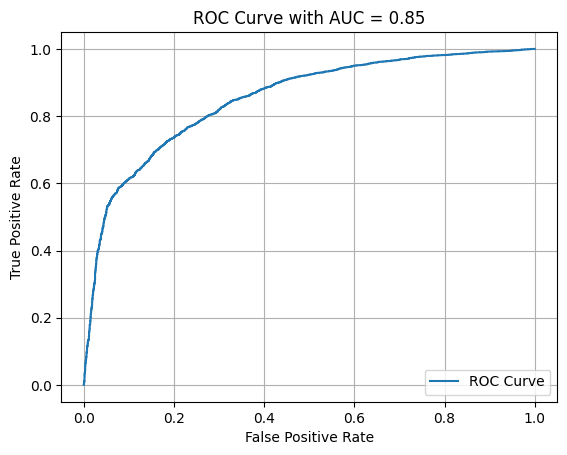

In [40]:
# cross_val_scores = cross_val_score(model_22, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)



model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model3.fit(x_train4,y_train4,epochs = 100)

Epoch 1/100
629/629 [==============================] - 1s 1ms/step - loss: 0.5108 - accuracy: 0.7513
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4418 - accuracy: 0.7921
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4385 - accuracy: 0.7926
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4364 - accuracy: 0.7930
Epoch 5/100
629/629 [==============================] - 1s 977us/step - loss: 0.4354 - accuracy: 0.7935
Epoch 6/100
629/629 [==============================] - 1s 973us/step - loss: 0.4343 - accuracy: 0.7934
Epoch 7/100
629/629 [==============================] - 1s 971us/step - loss: 0.4348 - accuracy: 0.7939
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4335 - accuracy: 0.7940
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.7940
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4323 - 

In [42]:
model3.evaluate(x_test4,y_test4)

210/210 [==============================] - 0s 955us/step - loss: 0.4588 - accuracy: 0.7782


[0.45879673957824707, 0.7781921029090881]

In [43]:
ypred_train11 = model3.predict(x_train4)
y_pred_test11 = model3.predict(x_test4)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train11))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test11))

210/210 [==============================] - 0s 716us/step
Training Results

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     10036
           1       0.79      0.82      0.81     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      3371
           1       0.77      0.78      0.78      3333

    accuracy                           0.78      6704
   macro avg       0.78      0.78      0.78      6704
weighted avg       0.78      0.78      0.78      6704



210/210 [==============================] - 0s 838us/step


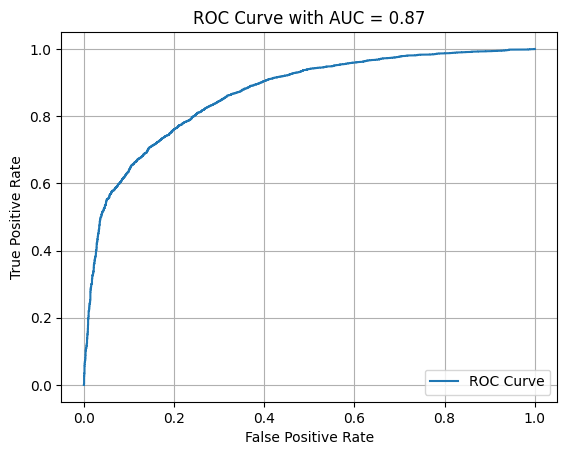

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model3.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [45]:
model4 = Sequential()
model4.add(Dense(units=20,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=15,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model4.fit(x=x_train4, 
          y=y_train4, 
          epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
629/629 [==============================] - 1s 1ms/step - loss: 0.6176 - val_loss: 0.5021
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.5237 - val_loss: 0.4686
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.5066 - val_loss: 0.4600
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4925 - val_loss: 0.4554
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4875 - val_loss: 0.4509
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4806 - val_loss: 0.4513
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4748 - val_loss: 0.4477
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4705 - val_loss: 0.4486
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4724 - val_loss: 0.4485
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4723 - val_lo

In [47]:
ypred_train12 = model4.predict(x_train4)
y_pred_test12 = model4.predict(x_test4)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train12))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test12))

210/210 [==============================] - 0s 745us/step
Training Results

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     10036
           1       0.79      0.81      0.80     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3371
           1       0.78      0.79      0.79      3333

    accuracy                           0.79      6704
   macro avg       0.79      0.79      0.79      6704
weighted avg       0.79      0.79      0.79      6704



210/210 [==============================] - 0s 822us/step


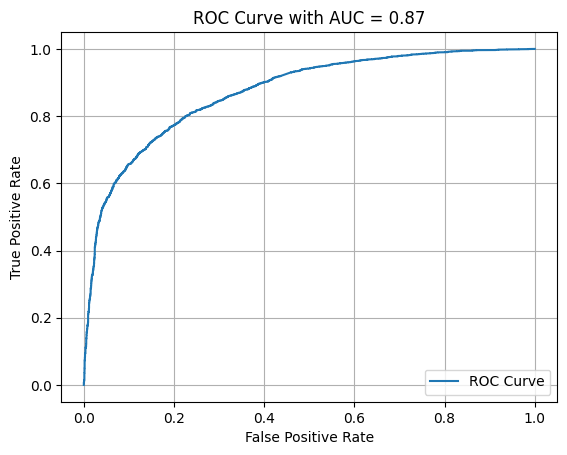

In [48]:
# cross_val_scores = cross_val_score(model1, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model4.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [49]:
model5 = Sequential()



model5.add(Dense(20,  activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(10, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(units=1,activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model5.fit(x=x_train4, 
          y=y_train4, 
          epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
629/629 [==============================] - 1s 2ms/step - loss: 0.5516 - val_loss: 0.4704
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4768 - val_loss: 0.4563
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4622 - val_loss: 0.4493
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4555 - val_loss: 0.4479
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4553 - val_loss: 0.4466
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4503 - val_loss: 0.4503
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4509 - val_loss: 0.4467
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4502 - val_loss: 0.4478
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4505 - val_loss: 0.4478
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4488 - val_lo

In [51]:
ypred_train13 = model5.predict(x_train4)
y_pred_test13 = model5.predict(x_test4)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print("Training Results\n")
print(classification_report(y_train4,ypred_train13))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test13))

210/210 [==============================] - 0s 712us/step
Training Results

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10036
           1       0.80      0.80      0.80     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      3371
           1       0.79      0.77      0.78      3333

    accuracy                           0.78      6704
   macro avg       0.78      0.78      0.78      6704
weighted avg       0.78      0.78      0.78      6704



210/210 [==============================] - 0s 707us/step


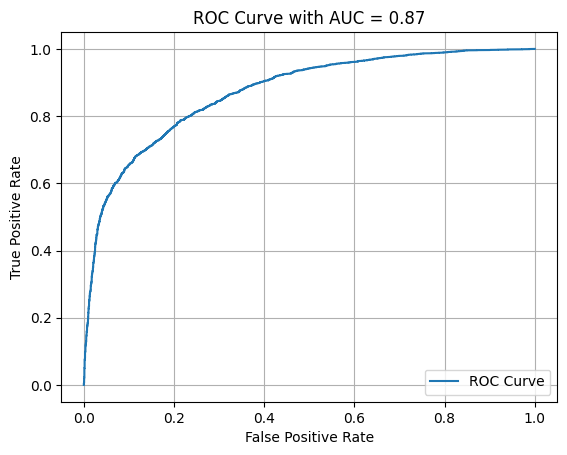

In [52]:
# cross_val_scores = cross_val_score(model2, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model5.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [53]:
model3 = SVC(probability=True)

In [54]:
model3.fit(x_train4,y_train4)

SVC(probability=True)

In [55]:
ypred_train14 = model3.predict(x_train4)
y_pred_test14 = model3.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4,ypred_train14))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test14))

Training Results

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     10036
           1       0.84      0.74      0.79     10074

    accuracy                           0.80     20110
   macro avg       0.80      0.80      0.80     20110
weighted avg       0.80      0.80      0.80     20110

Testing Results

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3371
           1       0.83      0.71      0.77      3333

    accuracy                           0.78      6704
   macro avg       0.79      0.78      0.78      6704
weighted avg       0.79      0.78      0.78      6704



In [56]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [57]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [58]:
grid.fit(x_train4,y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   6.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.779 total time=   6.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   6.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   6.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   6.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   5.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.782 total time=   5.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   5.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   5.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   5.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=   6.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [ ]:
ypred_train = grid.predict(x_train4)
y_pred_test = grid.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4,ypred_train))
print("Test Results\n")
print(classification_report(y_test4,y_pred_test))

Training Results

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     10036
           1       0.84      0.72      0.78     10074

    accuracy                           0.79     20110
   macro avg       0.80      0.79      0.79     20110
weighted avg       0.80      0.79      0.79     20110

Test Results

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      3371
           1       0.84      0.70      0.77      3333

    accuracy                           0.79      6704
   macro avg       0.79      0.79      0.78      6704
weighted avg       0.79      0.79      0.78      6704



Training Results

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     10036
           1       0.84      0.72      0.78     10074

    accuracy                           0.79     20110
   macro avg       0.80      0.79      0.79     20110
weighted avg       0.80      0.79      0.79     20110

Testing Results

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      3371
           1       0.84      0.70      0.77      3333

    accuracy                           0.79      6704
   macro avg       0.79      0.79      0.78      6704
weighted avg       0.79      0.79      0.78      6704



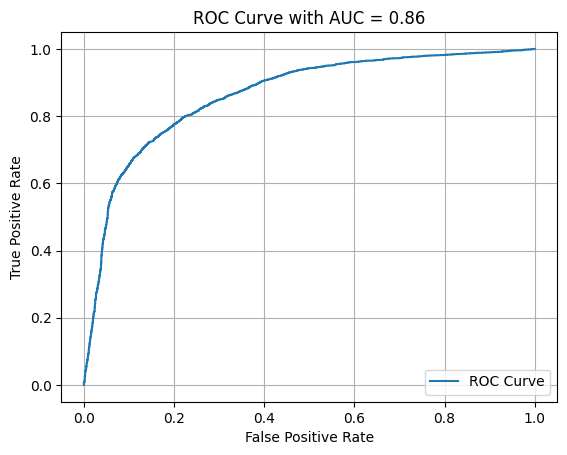

In [59]:
model3 = SVC(C=1000, gamma=0.01, kernel='rbf', probability=True)
model3.fit(x_train4, y_train4)


ypred_train14 = model3.predict(x_train4)
y_pred_test14 = model3.predict(x_test4)


print("Training Results\n")
print(classification_report(y_train4, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test4, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model3.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()